In [1]:
import sys
import os

# Добавляем путь к корню проекта
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from data_loader import DataProcessor
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
# Подготовка данных
processor = DataProcessor()
processor.load_csv('../data/alzheimers_prediction_dataset.csv')

X = processor.data.drop('Alzheimer’s Diagnosis', axis=1)
X = pd.get_dummies(X)
y = processor.data['Alzheimer’s Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
scaled_X_train = imputer.fit_transform(scaled_X_train)
scaled_X_test = imputer.transform(scaled_X_test)

Данные успешно загружены из csv!


              precision    recall  f1-score   support

          No       0.73      0.79      0.76      8614
         Yes       0.68      0.61      0.64      6243

    accuracy                           0.71     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857

Accuracy: 71.41%


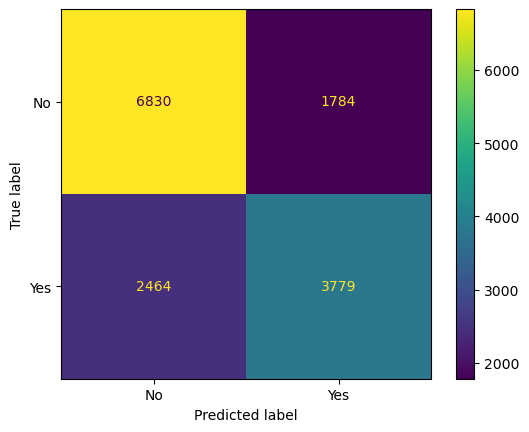

In [3]:
# Логистическая регрессия
model = LogisticRegression(C=0.1, max_iter=100, solver='newton-cg')
model.fit(scaled_X_train, y_train)

# Предсказание
y_pred = model.predict(scaled_X_test)

# Оценка модели
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)

In [4]:
# попробуем кросс-валидацию
scores = cross_val_score(model, scaled_X_train, y_train, cv=5, scoring='accuracy')
print(f'Средняя точность модели: {scores.mean() * 100:.2f}%')

Средняя точность модели: 71.48%


In [5]:
# проверяю дисбаланс классов
print(y.value_counts())

Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


              precision    recall  f1-score   support

          No       0.78      0.71      0.74      8614
         Yes       0.65      0.72      0.68      6243

    accuracy                           0.72     14857
   macro avg       0.71      0.72      0.71     14857
weighted avg       0.72      0.72      0.72     14857

Accuracy: 71.68%


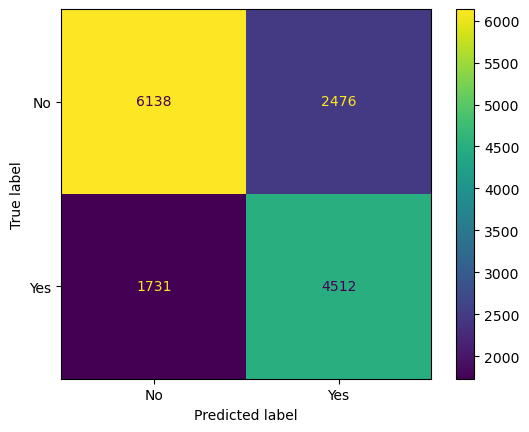

In [6]:
# устраняю дисбаланс балансировкой
model = LogisticRegression(class_weight='balanced', C=0.1, max_iter=100, solver='newton-cg')
model.fit(scaled_X_train, y_train)

# Предсказание
y_pred = model.predict(scaled_X_test)

# Оценка модели
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)

              precision    recall  f1-score   support

          No       0.75      0.78      0.76      8614
         Yes       0.68      0.65      0.66      6243

    accuracy                           0.72     14857
   macro avg       0.72      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857

Accuracy: 72.26%


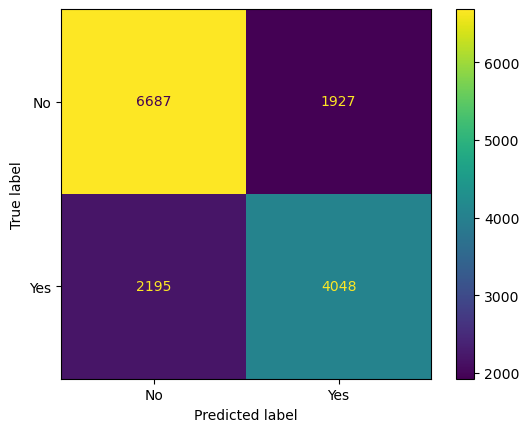

In [7]:
# RandomForestClassifier
model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

              precision    recall  f1-score   support

          No       0.78      0.73      0.76      8614
         Yes       0.66      0.72      0.69      6243

    accuracy                           0.73     14857
   macro avg       0.72      0.73      0.72     14857
weighted avg       0.73      0.73      0.73     14857

Accuracy: 72.69%


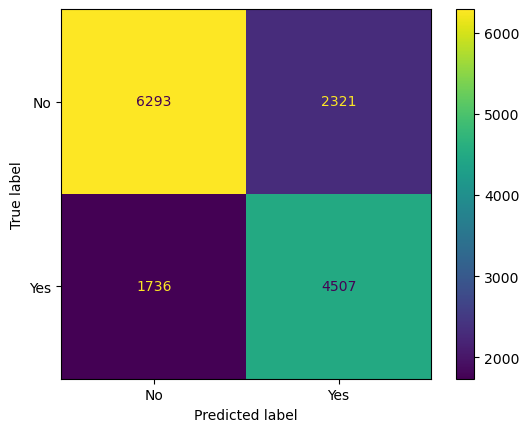

In [8]:
# Учитываем дисбаланс классов
model = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=1342,
    class_weight='balanced'
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);